-------------------------------------------------------------
### <center> CS 3110 - SOFTWARE ENGINEERING 
### <center> E - PUNLA: Optimizing Crop Production Through Leaf Disease Prediction
-------------------------------------------------------------

#### <center> 𝗩𝗮𝗹𝗹𝗲, 𝗡𝗲𝗿𝗶𝘀𝗮 𝗦. 
#### <center> De Silva, Mark Bryan 
#### <center> 𝗕𝗦𝗖𝗦 - 3𝗔

# Import Necessary Libraries

For building a neural network model and handling data, the use of necessary libraries, specifically TensorFlow and Keras, is used to work with the data stored in CSV format.

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

## References:
 --> Dataset from: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset?select=New+Plant+Diseases+Dataset%28Augmented%29
 
 --->Cmap colors:https://www.kaggle.com/code/asimislam/python-colors-color-cmap-palette 

In [2]:
train_dir = 'D:/E-PUNLA/data/train'
val_dir = 'D:/E-PUNLA/data/valid'

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 13467 images belonging to 2 classes.
Found 6089 images belonging to 2 classes.


In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(train_generator.class_indices), activation='softmax')
])


C:\Users\Nancy Valle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

C:\Users\Nancy Valle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
421/421 ━━━━━━━━━━━━━━━━━━━━ 838s 2s/step - accuracy: 0.8529 - loss: 0.3456 - val_accuracy: 0.9557 - val_loss: 0.1208
Epoch 2/10
421/421 ━━━━━━━━━━━━━━━━━━━━ 408s 967ms/step - accuracy: 0.9590 - loss: 0.1109 - val_accuracy: 0.9736 - val_loss: 0.0721
Epoch 3/10
421/421 ━━━━━━━━━━━━━━━━━━━━ 172s 409ms/step - accuracy: 0.9791 - loss: 0.0537 - val_accuracy: 0.9821 - val_loss: 0.0540
Epoch 4/10
421/421 ━━━━━━━━━━━━━━━━━━━━ 167s 397ms/step - accuracy: 0.9867 - loss: 0.0381 - val_accuracy: 0.9264 - val_loss: 0.1673
Epoch 5/10
421/421 ━━━━━━━━━━━━━━━━━━━━ 173s 411ms/step - accuracy: 0.9740 - loss: 0.0632 - val_accuracy: 0.9924 - val_loss: 0.0268
Epoch 6/10
421/421 ━━━━━━━━━━━━━━━━━━━━ 171s 406ms/step - accuracy: 0.9950 - loss: 0.0146 - val_accuracy: 0.9555 - val_loss: 0.1430
Epoch 7/10
421/421 ━━━━━━━━━━━━━━━━━━━━ 170s 404ms/step - accuracy: 0.9918 - loss: 0.0256 - val_accuracy: 0.9923 - val_loss: 0.0251
Epoch 8/10
421/421 ━━━━━━━━━━━━━━━━━━━━ 176s 417ms/step - accuracy: 0.9968 - lo

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [10]:
epochs_range = range(10)

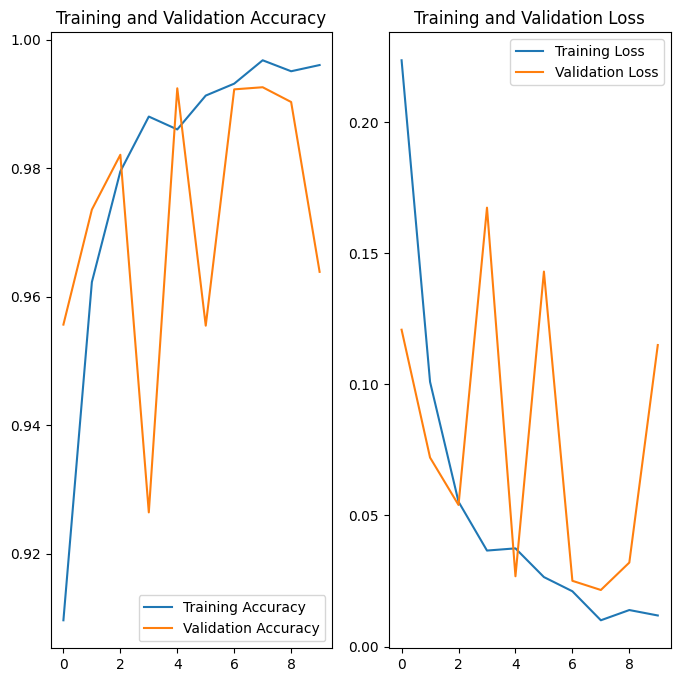

In [11]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [14]:
model.save('leaf.h5')

In [13]:
model.save('leaf_model.h5')

In [15]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [16]:
def predict_image(img_path, model, class_indices):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    class_labels = {v: k for k, v in class_indices.items()}
    return class_labels[predicted_class]

In [17]:
test_image_path = 'try.jpg'
predicted_class = predict_image(test_image_path, model, train_generator.class_indices)
print(f"Predicted class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
Predicted class: healthy


In [18]:
test_image_path = 'try2.jpg'
predicted_class = predict_image(test_image_path, model, train_generator.class_indices)
print(f"Predicted class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted class: unhealthy
